In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [ ]:
mh=pd.read_csv('Melbourne_housing_FULL.csv')

In [9]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom          26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13760 non-null object
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Latitude         26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34857 non-null object
Propertycount    34854 non-null float64
ParkingArea      34857 non-null object
Price            27247 non-null float64
dtypes: float64(11), in

In [10]:
mh

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
5,Alphington,6 Smith St,4,h,S,Brace,3/9/2016,6.4,3078.0,3.0,...,853.0,263,1930.0,Darebin City Council,-37.77070,145.03180,Northern Metropolitan,2211.0,Underground,2000000.0
6,Alphington,5/6 Yarralea St,3,h,S,Jellis,3/9/2016,6.4,3078.0,3.0,...,208.0,inf,2013.0,Darebin City Council,-37.78540,145.03250,Northern Metropolitan,2211.0,Outdoor Stall,1110000.0
7,Altona,158 Queen St,3,h,VB,Greg,3/9/2016,13.8,3018.0,3.0,...,352.0,242,2015.0,Hobsons Bay City Council,-37.87000,144.82500,Western Metropolitan,5301.0,Parking Pad,520000.0
8,Altona North,1 Beuron Rd,3,h,SP,Williams,3/9/2016,11.1,3025.0,3.0,...,620.0,108,1950.0,Hobsons Bay City Council,-37.82900,144.84800,Western Metropolitan,5132.0,Carport,NaN
9,Altona North,45 Hearn St,5,h,S,FN,3/9/2016,11.1,3025.0,5.0,...,592.0,251,1965.0,Hobsons Bay City Council,-37.83880,144.85670,Western Metropolitan,5132.0,Detached Garage,1085000.0


In [11]:
num_col=list(mh.select_dtypes(exclude=['object']))

In [12]:
num_col

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'Latitude',
 'Longtitude',
 'Propertycount',
 'Price']

In [13]:
mh.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

The above function used give us nummber of missing enteries in the data frame in each columns

# Data cleaning 
<span style="font-family: Arial; font-size:1.4em;color:green;"> Distance  </p>

In [14]:
mh['Distance'].describe()

count    34856.000000
mean        11.184929
std          6.788892
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

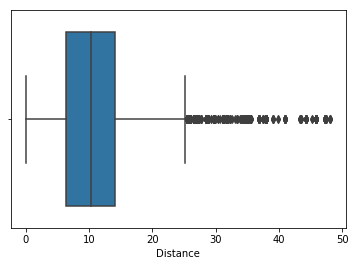

In [15]:
sns.boxplot(mh['Distance'])
plt.show()

As we observe there are outliers in this plot so we will use iqr method to remove the outliers but we will first check the number of outliers

In [13]:
q1=mh.quantile(q=0.25)
q2=mh.quantile(q=0.50)
q3=mh.quantile(q=0.75)
iqr=q3-q1
ll=q1-(iqr*1.5)
ul=q3+(iqr*1.5)

In [14]:
mh['Distance'].fillna(mh['Distance'].mean(),inplace=True)

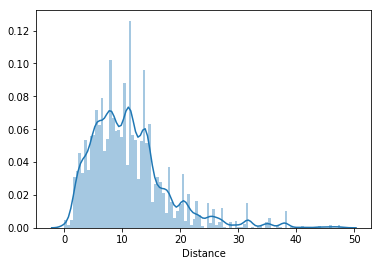

In [15]:
sns.distplot(mh['Distance'],bins=100)
plt.show()

In [16]:
mh['Distance'].skew()

1.503607382644056

In [17]:
mh['ldistance']=np.log(mh['Distance'])

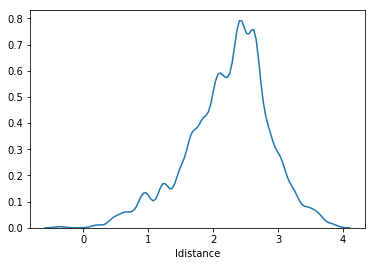

In [18]:
sns.distplot(mh['ldistance'],hist=False,kde=True)

In [19]:
mh['ldistance'].skew()

nan

Finally we using zscore or standard deviation method to drop the outliers 

In [20]:
mh=mh[(np.abs(stats.zscore(mh['Distance']))<3)]

In [21]:
mh['Distance'].describe()

count    34065.000000
mean        10.604967
std          5.646431
min          0.000000
25%          6.300000
50%         10.200000
75%         13.900000
max         31.400000
Name: Distance, dtype: float64

<span style="font-family: Arial; font-size:1.4em;color:green;"> Rooms  </p> 

In [22]:
mh['Rooms'].describe()

count    34065.000000
mean         3.021753
std          0.971513
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

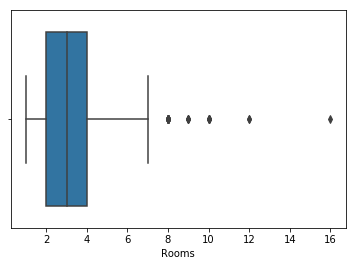

In [23]:
sns.boxplot(mh['Rooms'])

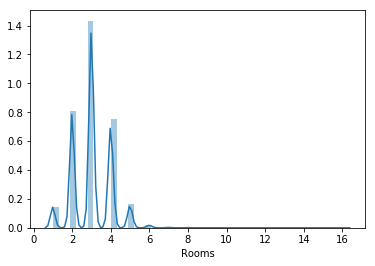

In [24]:
sns.distplot(mh['Rooms'])
plt.show()

We can observe that there are outliers in this column.So we need to clean it.

In [25]:
mh['Rooms'].value_counts()

3     14649
2      8292
4      7692
5      1694
1      1477
6       200
7        30
8        18
10        6
9         4
12        2
16        1
Name: Rooms, dtype: int64

In [26]:
q1=mh['Rooms'].quantile(q=0.25)
q3=mh['Rooms'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
mh=mh[~((mh['Rooms']<ll)|(mh['Rooms']>ul))]

In [27]:
mh['Rooms'].describe()

count    34034.000000
mean         3.016278
std          0.953461
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Rooms, dtype: float64

The outliers have been reduced.

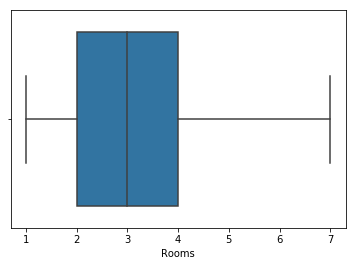

In [28]:
sns.boxplot(mh['Rooms'])

<span style="font-family: Arial; font-size:1.4em;color:green;"> Postcode </p> 

In [29]:
mh['Postcode'].describe()

count    34033.000000
mean      3108.145153
std         88.438876
min       3000.000000
25%       3047.000000
50%       3101.000000
75%       3150.000000
max       3802.000000
Name: Postcode, dtype: float64

In [30]:
mh['Postcode'].isnull().sum()

1

In [31]:
mh['Postcode'].fillna(mh['Postcode'].mode()[0],inplace=True)

In [32]:
mh['Postcode'].value_counts()

3073.0    845
3046.0    638
3020.0    617
3121.0    612
3165.0    583
3058.0    555
3040.0    533
3204.0    518
3163.0    508
3032.0    497
3012.0    497
3146.0    491
3072.0    484
3181.0    467
3101.0    466
3186.0    455
3056.0    444
3084.0    442
3141.0    435
3122.0    427
3070.0    424
3124.0    422
3104.0    420
3127.0    405
3188.0    395
3145.0    393
3187.0    392
3044.0    378
3011.0    375
3182.0    374
         ... 
3022.0     33
3089.0     31
3093.0     28
3177.0     28
3802.0     26
3180.0     25
3036.0     23
3137.0     22
3061.0     20
3179.0     19
3113.0     19
3335.0     17
3008.0     16
3116.0     12
3427.0     10
3027.0      7
3140.0      7
3202.0      5
3154.0      5
3115.0      3
3160.0      3
3090.0      2
3158.0      2
3099.0      2
3096.0      2
3765.0      2
3788.0      1
3428.0      1
3775.0      1
3786.0      1
Name: Postcode, Length: 179, dtype: int64

In [33]:
mh['Postcode'].isnull().sum()

0

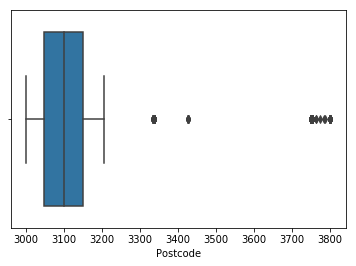

In [34]:
sns.boxplot(mh['Postcode'])

In [35]:
q1=mh['Postcode'].quantile(q=0.25)
q3=mh['Postcode'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [36]:
mh=mh[~((mh['Postcode']<ll)|(mh['Postcode']>ul))]

In [37]:
mh['Postcode'].describe()

count    33601.000000
mean      3100.968334
std         59.123778
min       3000.000000
25%       3047.000000
50%       3101.000000
75%       3148.000000
max       3207.000000
Name: Postcode, dtype: float64

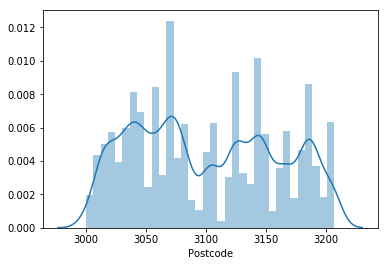

In [38]:
sns.distplot(mh['Postcode'])
plt.show()

<span style="font-family: Arial; font-size:1.4em;color:green;"> Bedroom </p> 

In [39]:
mh['Bedroom'].describe()

count    25597.000000
mean         3.064422
std          0.972283
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: Bedroom, dtype: float64

In [40]:
q1=mh['Bedroom'].quantile(q=0.25)
q3=mh['Bedroom'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [41]:
mh=mh[~((mh['Bedroom']<ll)|(mh['Bedroom']>ul))]

In [42]:
mh['Bedroom'].fillna(mh['Bedroom'].mode()[0],inplace=True)

In [43]:
mh['Bedroom'].isnull().sum()

0

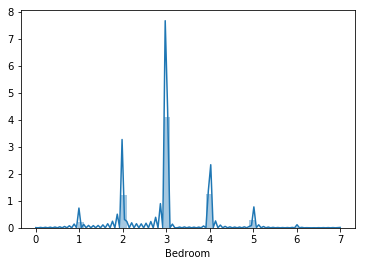

In [44]:
sns.distplot(mh['Bedroom'])

In [45]:
mh['Bedroom'].describe()

count    33594.000000
mean         3.046854
std          0.827738
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: Bedroom, dtype: float64

<span style="font-family: Arial; font-size:1.4em;color:green;"> Bathroom </p> 

In [46]:
mh['Bathroom'].describe()

count    25581.00000
mean         1.61444
std          0.71574
min          0.00000
25%          1.00000
50%          2.00000
75%          2.00000
max          7.00000
Name: Bathroom, dtype: float64

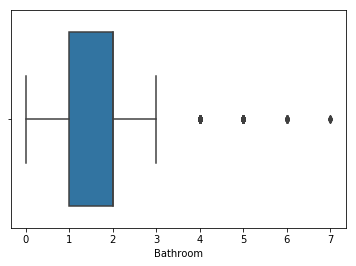

In [47]:
sns.boxplot(mh['Bathroom'])

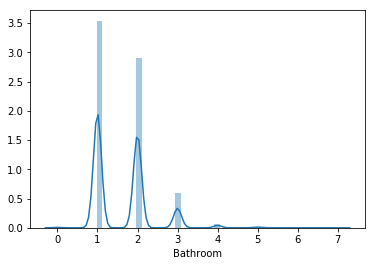

In [48]:
sns.distplot(mh['Bathroom'].dropna())

In [49]:
q1=mh['Bathroom'].quantile(q=0.25)
q3=mh['Bathroom'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [50]:
mh=mh[~((mh['Bathroom']<ll)|(mh['Bathroom']>ul))]

In [51]:
mh['Bathroom'].fillna(mh['Bathroom'].mode()[0],inplace=True)

In [52]:
mh['Bathroom'].describe()

count    33252.000000
mean         1.438710
std          0.613525
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Bathroom, dtype: float64

In [53]:
mh['Bathroom'].value_counts()

1.0    20690
2.0    10398
3.0     2118
0.0       46
Name: Bathroom, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:green;"> Landsize </p> 

In [54]:
mh['Landsize'].isnull().sum()

11334

In [55]:
mh['Landsize'].describe()

count     21918.000000
mean        550.350306
std        3099.856977
min           0.000000
25%         214.000000
50%         501.000000
75%         664.000000
max      433014.000000
Name: Landsize, dtype: float64

In [56]:
mh['Landsize'].value_counts()

0.0       2433
650.0      187
697.0      118
585.0       92
604.0       80
534.0       79
700.0       77
696.0       76
600.0       60
590.0       59
653.0       59
530.0       59
652.0       59
557.0       57
581.0       56
531.0       55
400.0       54
654.0       53
603.0       53
535.0       51
602.0       51
660.0       51
649.0       50
725.0       50
651.0       49
586.0       49
613.0       49
560.0       48
612.0       48
589.0       48
          ... 
3434.0       1
5325.0       1
1389.0       1
2692.0       1
1717.0       1
1996.0       1
1317.0       1
2120.0       1
2925.0       1
3705.0       1
1209.0       1
1556.0       1
1302.0       1
4332.0       1
1339.0       1
5865.0       1
1751.0       1
3132.0       1
1256.0       1
2673.0       1
1042.0       1
3414.0       1
1465.0       1
38.0         1
1230.0       1
1606.0       1
2927.0       1
4829.0       1
1176.0       1
4292.0       1
Name: Landsize, Length: 1617, dtype: int64

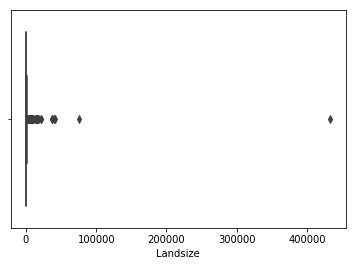

In [57]:
sns.boxplot(mh['Landsize'])

In [58]:
q1=mh['Landsize'].quantile(q=0.25)
q3=mh['Landsize'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [59]:
print(ll,ul)

-461.0 1339.0


In [60]:
mh['Landsize']=mh['Landsize'].map(lambda x:np.NaN if ((x<550)|(x>1339))else x)

In [61]:
mh['Landsize'].fillna(method='bfill',inplace=True)

In [62]:
mh['Landsize'].isnull().sum()

0

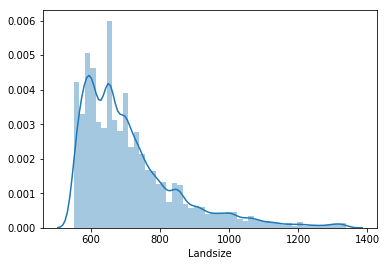

In [63]:
sns.distplot(mh['Landsize'])
plt.show()

<span style="font-family: Arial; font-size:1.4em;color:red;"> Car </p> 

In [64]:
mh['Car'].describe()

count    24756.000000
mean         1.698497
std          0.991166
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64

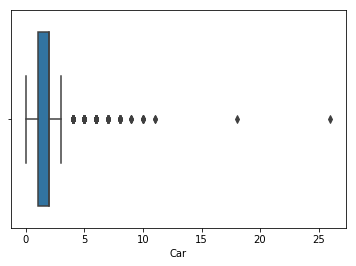

In [65]:
sns.boxplot(mh['Car'])
plt.show()

In [66]:
q1=mh['Car'].quantile(q=0.25)
q3=mh['Car'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [67]:
mh['Car'].value_counts()

2.0     11352
1.0      8996
0.0      1595
3.0      1490
4.0      1025
5.0       132
6.0       119
7.0        19
8.0        16
10.0        5
9.0         3
11.0        2
26.0        1
18.0        1
Name: Car, dtype: int64

In [68]:
mh['Car'].describe()

count    24756.000000
mean         1.698497
std          0.991166
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64

In [69]:
print(ll,ul)

-0.5 3.5


In [70]:
mh['Car']=mh['Car'].map(lambda x:np.NaN if ((x<0)|(x>3.5))else x)

In [71]:
len(mh[mh['Car']>3.5])

0

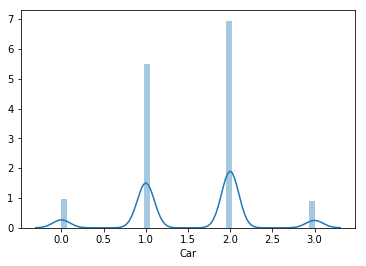

In [72]:
sns.distplot(mh['Car'].dropna())

In [73]:
mh['Car']=mh['Car'].fillna(method='ffill')

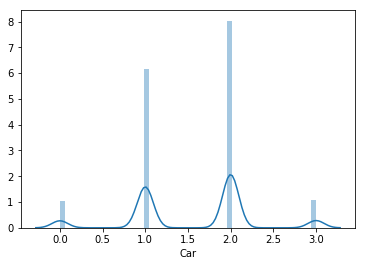

In [74]:
sns.distplot(mh['Car'])
plt.show()

<span style="font-family: Arial; font-size:1.4em;color:red;"> YearBuild </p> 

In [75]:
mh['YearBuilt'].describe()

count    14677.000000
mean      1964.081829
std         37.468665
min       1196.000000
25%       1940.000000
50%       1970.000000
75%       1999.000000
max       2106.000000
Name: YearBuilt, dtype: float64

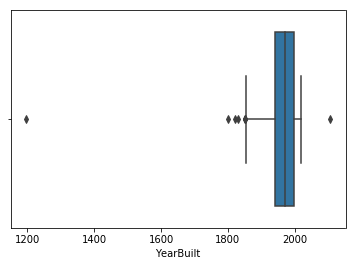

In [76]:
sns.boxplot(mh['YearBuilt'])

In [77]:
q1=mh['YearBuilt'].quantile(q=0.25)
q3=mh['YearBuilt'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [78]:
mh=mh[~((mh['YearBuilt']<ll)|(mh['YearBuilt']>ul))]

In [79]:
mh['YearBuilt'].fillna(method='bfill',inplace=True)

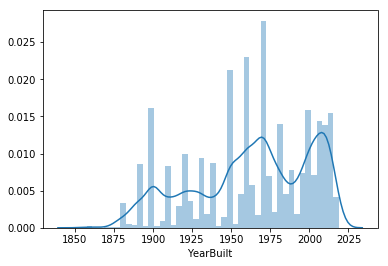

In [80]:
sns.distplot(mh['YearBuilt'])

<span style="font-family: Arial; font-size:1.4em;color:green;"> Latitude </p> 

In [81]:
mh['Latitude'].describe()

count    25470.000000
mean       -37.810516
std          0.078242
min        -38.079600
25%        -37.861280
50%        -37.808015
75%        -37.757185
max        -37.530400
Name: Latitude, dtype: float64

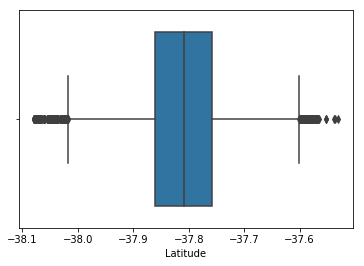

In [82]:
sns.boxplot(mh['Latitude'])

In [83]:
q1=mh['Latitude'].quantile(q=0.25)
q3=mh['Latitude'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [84]:
len(mh[mh['Latitude']<ll])

129

In [85]:
mh['Latitude']=mh['Latitude'].map(lambda x:np.NaN if ((x<ll)|(x>ul))else x)

In [86]:
mh['Latitude'].fillna(method='ffill',inplace=True)

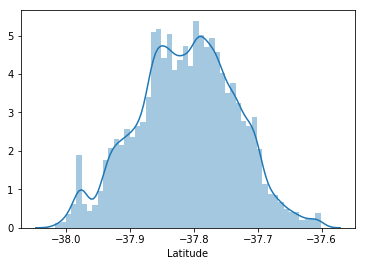

In [87]:
sns.distplot(mh['Latitude'])
plt.show()

<span style="font-family: Arial; font-size:1.4em;color:green;"> Longtitude </p> 

In [88]:
mh['Longtitude'].describe()

count    25470.000000
mean       145.001609
std          0.110224
min        144.597410
25%        144.933885
50%        145.005755
75%        145.067695
max        145.369470
Name: Longtitude, dtype: float64

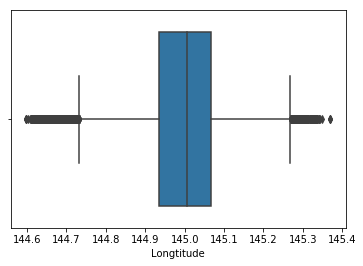

In [89]:
sns.boxplot(mh['Longtitude'])

In [90]:
q1=mh['Longtitude'].quantile(q=0.25)
q3=mh['Longtitude'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [91]:
mh['Longtitude']=mh['Longtitude'].map(lambda x:np.NaN if ((x<ll)|(x>ul))else x)

In [92]:
mh['Longtitude'].fillna(method='ffill',inplace=True)

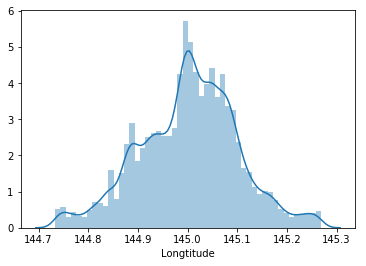

In [93]:
sns.distplot(mh['Longtitude'])
plt.show()

<span style="font-family: Arial; font-size:1.4em;color:green;"> Propertycount </p> 

In [94]:
mh['Propertycount'].describe()

count    33240.000000
mean      7538.949308
std       4406.784543
min        121.000000
25%       4385.000000
50%       6567.000000
75%      10331.000000
max      21650.000000
Name: Propertycount, dtype: float64

In [95]:
q1=mh['Propertycount'].quantile(q=0.25)
q3=mh['Propertycount'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [96]:
print(ll,ul)

-4534.0 19250.0


In [97]:
len(mh[mh['Propertycount']<ll])

0

In [98]:
mh['Propertycount']=mh['Propertycount'].map(lambda x:np.NaN if ((x<ll)|(x>ul))else x)

In [99]:
mh['Propertycount'].fillna(method='ffill',inplace=True)

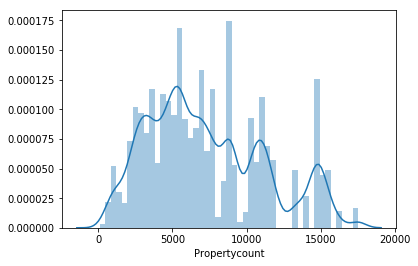

In [100]:
sns.distplot(mh['Propertycount'])
plt.show()

In [101]:
mh.drop('ldistance',axis=1,inplace=True)

<span style="font-family: Arial; font-size:1.4em;color:red;"> Price </p> 

In [102]:
mh['Price'].describe()

count    2.599400e+04
mean     1.052075e+06
std      6.184914e+05
min      8.500000e+04
25%      6.490000e+05
50%      8.850000e+05
75%      1.300000e+06
max      1.120000e+07
Name: Price, dtype: float64

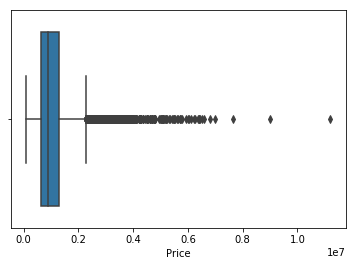

In [103]:
sns.boxplot(mh['Price'])
plt.show()

In [104]:
len(mh[mh['Price']>ul])

25994

In [105]:
print(ll,ul)

-4534.0 19250.0


In [106]:
mh['Price'].isnull().sum()

7249

In [107]:
mh['Price'].value_counts()

1100000.0    231
600000.0     219
800000.0     212
1300000.0    209
650000.0     206
1000000.0    203
1200000.0    201
750000.0     189
900000.0     187
700000.0     187
850000.0     172
950000.0     171
1250000.0    155
1500000.0    152
1400000.0    148
1150000.0    144
500000.0     138
1050000.0    136
550000.0     128
780000.0     128
770000.0     127
720000.0     123
1350000.0    122
680000.0     119
820000.0     118
660000.0     117
730000.0     117
640000.0     114
620000.0     114
760000.0     112
            ... 
903500.0       1
2718000.0      1
413500.0       1
343000.0       1
1490500.0      1
1312500.0      1
1097500.0      1
2103000.0      1
1282500.0      1
613500.0       1
590250.0       1
1489000.0      1
262500.0       1
2714000.0      1
1657000.0      1
484852.0       1
247500.0       1
940750.0       1
3501000.0      1
372100.0       1
1833000.0      1
1522000.0      1
334000.0       1
1357500.0      1
1677000.0      1
1939000.0      1
1334000.0      1
678913.0      

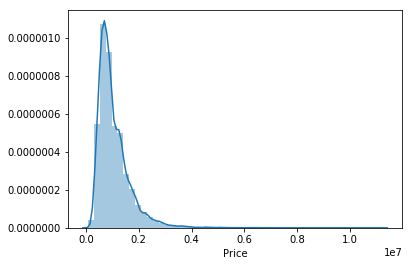

In [108]:
sns.distplot(mh['Price'].dropna())

In [109]:
mh['lprice']=np.log(mh['Price'])

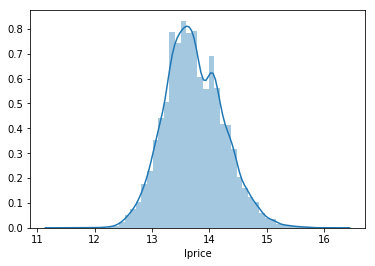

In [110]:
sns.distplot(mh['lprice'].dropna())

In [111]:
mh['lprice'].isnull().sum()

7249

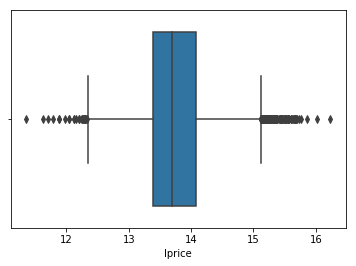

In [112]:
sns.boxplot(mh['lprice'])

In [113]:
q1=mh['lprice'].quantile(q=0.25)
q3=mh['lprice'].quantile(q=0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [114]:
mh['lprice']=mh['lprice'].map(lambda x:np.NaN if ((x<ll)|(x>ul))else x)

In [115]:
mh['lprice'].isnull().sum()

7437

In [116]:
mh['lprice'].fillna(method='bfill',inplace=True)

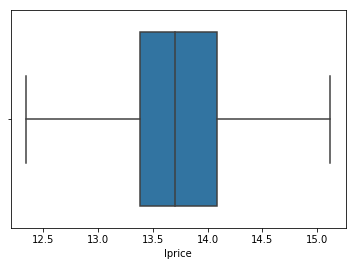

In [117]:
sns.boxplot(mh['lprice'])

# ANALYSIS

In [118]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33243 entries, 0 to 34856
Data columns (total 23 columns):
Suburb           33243 non-null object
Address          33243 non-null object
Rooms            33243 non-null int64
Type             33243 non-null object
Method           33243 non-null object
SellerG          33243 non-null object
Date             33243 non-null object
Distance         33243 non-null float64
Postcode         33243 non-null float64
Bedroom          33243 non-null float64
Bathroom         33243 non-null float64
Car              33243 non-null float64
Landsize         33243 non-null float64
BuildingArea     12910 non-null object
YearBuilt        33243 non-null float64
CouncilArea      33240 non-null object
Latitude         33243 non-null float64
Longtitude       33243 non-null float64
Regionname       33243 non-null object
Propertycount    33243 non-null float64
ParkingArea      33243 non-null object
Price            25994 non-null float64
lprice           33243 

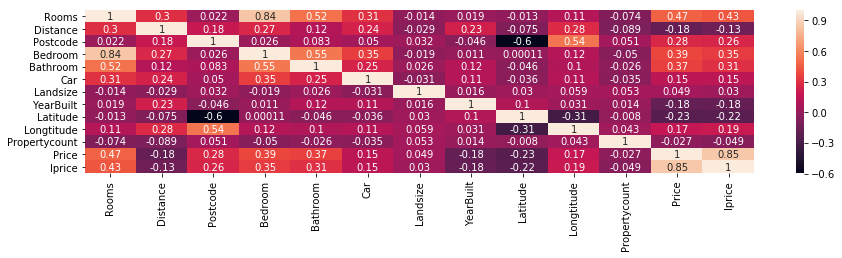

In [119]:
fig,ax=plt.subplots(figsize=(15,3))
sns.heatmap(mh.corr(),annot=True)
plt.show()

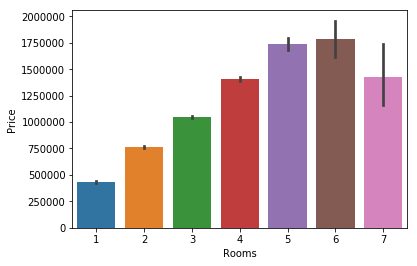

In [120]:
sns.barplot(data=mh,x='Rooms',y='Price')

In [ ]:
sns.barplot(data=mh,x='Type',y='Price')

In [ ]:
sns.countplot(data = mh,x = 'Address')

In [ ]:
sns.barplot(data=mh,x='Rooms',y='Landsize')